In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path = 'data/bank marketing/bank-full.csv'
data = pd.read_csv(path, delimiter=';')

In [25]:
# age into bins
data.age  = data.age // 10 * 10
data['subscription'] = data['y']
data.replace({"no": False, "yes": True}, inplace=True)
data = data.drop(columns=['y'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,50,management,married,tertiary,False,2143,True,False,unknown,5,may,261,1,-1,0,unknown,False
1,40,technician,single,secondary,False,29,True,False,unknown,5,may,151,1,-1,0,unknown,False
2,30,entrepreneur,married,secondary,False,2,True,True,unknown,5,may,76,1,-1,0,unknown,False
3,40,blue-collar,married,unknown,False,1506,True,False,unknown,5,may,92,1,-1,0,unknown,False
4,30,unknown,single,unknown,False,1,False,False,unknown,5,may,198,1,-1,0,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,50,technician,married,tertiary,False,825,False,False,cellular,17,nov,977,3,-1,0,unknown,True
45207,70,retired,divorced,primary,False,1729,False,False,cellular,17,nov,456,2,-1,0,unknown,True
45208,70,retired,married,secondary,False,5715,False,False,cellular,17,nov,1127,5,184,3,success,True
45209,50,blue-collar,married,secondary,False,668,False,False,telephone,17,nov,508,4,-1,0,unknown,False


In [26]:
columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription']
categorical_column = ['job', 'marital', 'education', 'contact','month','poutcome']       

In [27]:
def plotOccurence(data,colname,label):
    plot=pd.crosstab(index=data[colname],columns=data[label]).plot(kind='bar',stacked=True,figsize=(16,5))
    plt.xlabel(colname)
    plt.ylabel('Count')
    plt.grid(axis='y',linestyle='-')
    plt.title(colname+" vs "+label+" count")

In [28]:
def plotProportion(data,colname,label):
    plot=pd.crosstab(index=data[colname],columns=data[label],normalize='index').plot(kind='bar',stacked=True,figsize=(16,5))
    plt.xlabel(colname)
    plt.ylabel('Proportion')
    plt.grid(axis='y',linestyle='-')
    plt.title(colname+" vs "+label+" proportion")

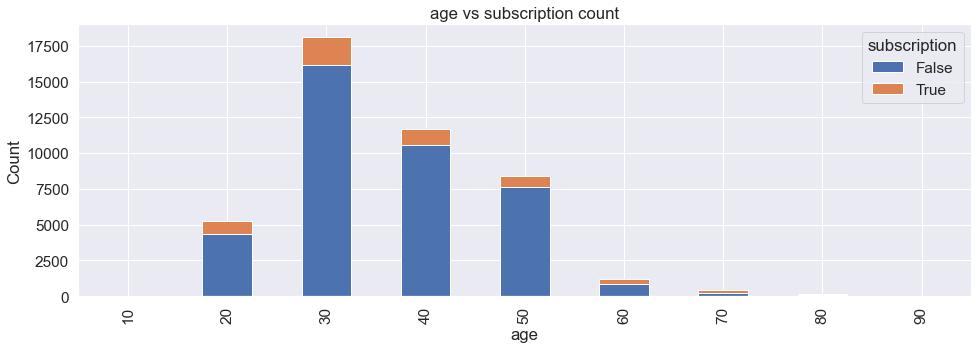

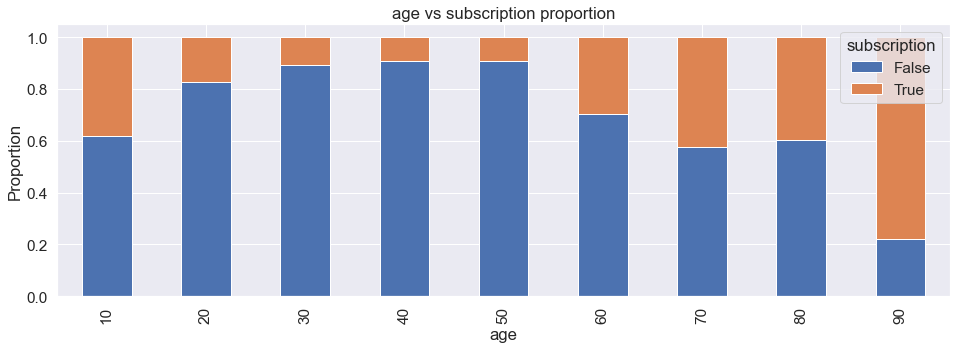

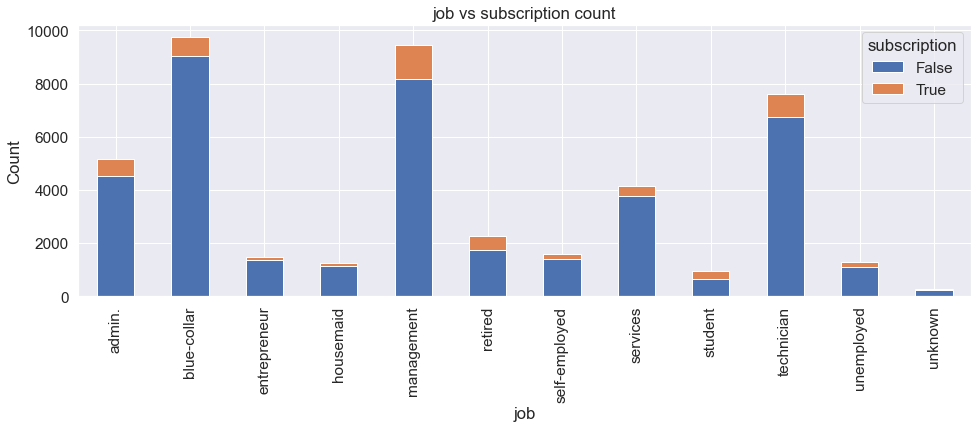

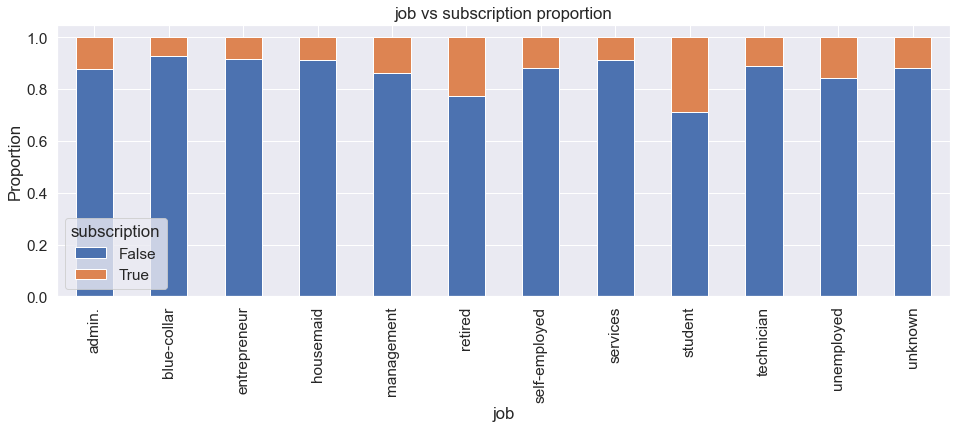

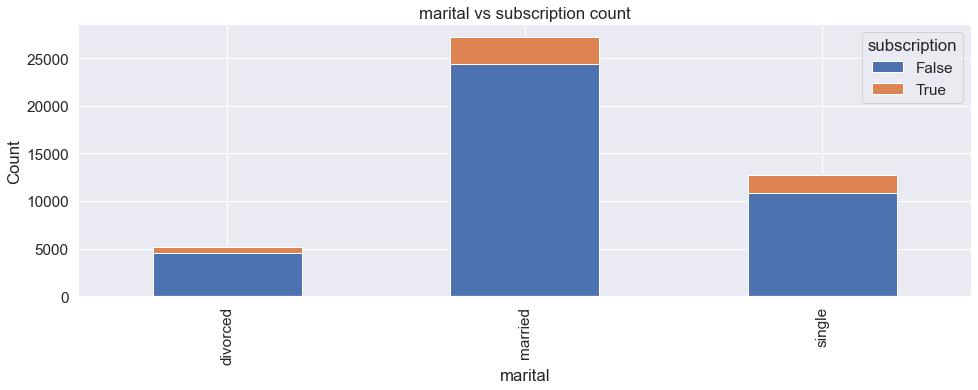

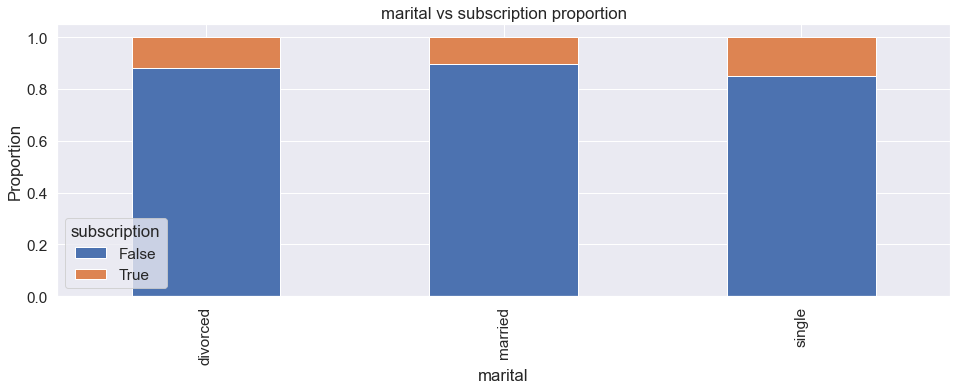

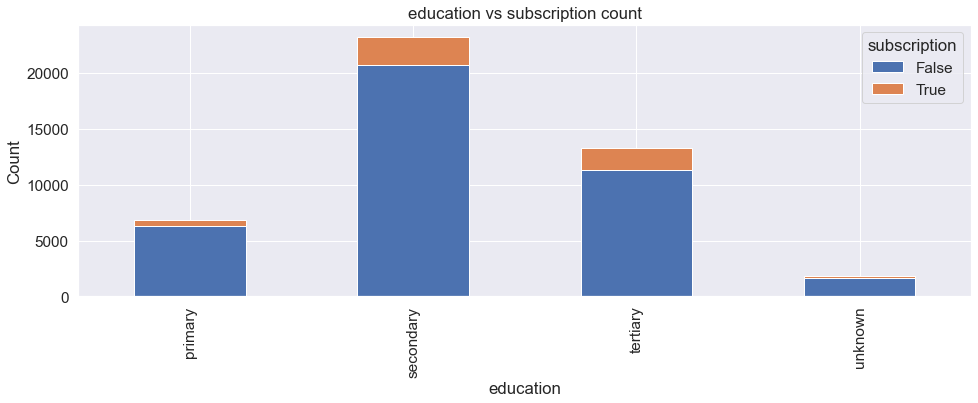

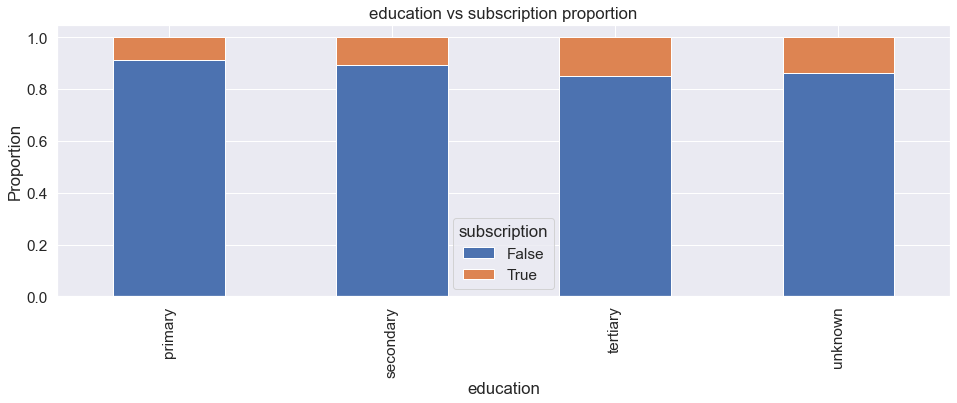

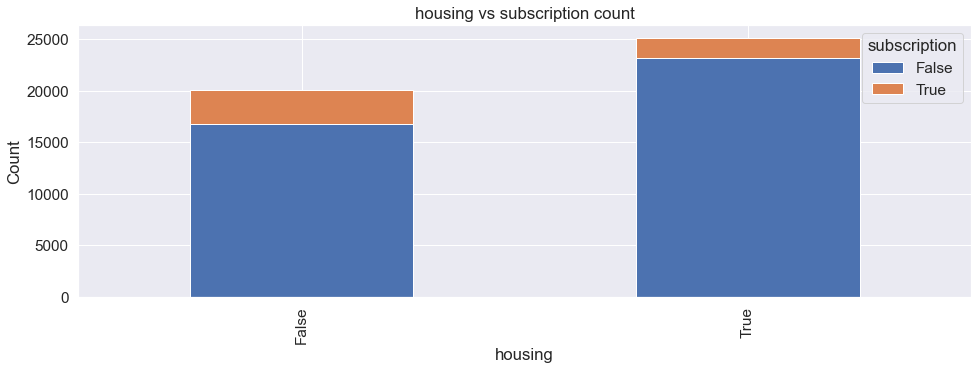

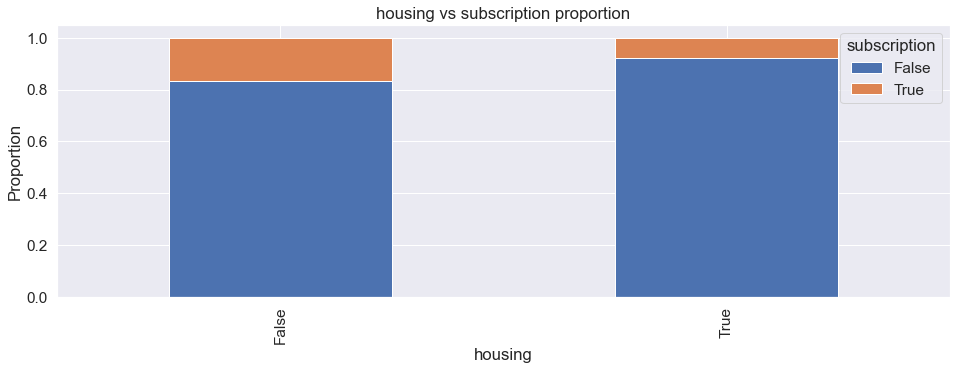

In [29]:
columns = ['age', 'job', 'marital', 'education', 'housing']
for col in columns:
    plotOccurence(data, col, 'subscription')
    plotProportion(data, col, 'subscription')

In [30]:
def correlation_matrix(data, target):
    sns.heatmap(data.corr()[[target]].sort_values(by=target, ascending=False), annot=True)
    plt.show()
correlation_matrix(data, 'subscription')

In [32]:
def bar_graph(dataframe, column_name):
    sns.set(font_scale=1.4)
    dataframe[column_name].value_counts().plot(kind='bar')
    plt.xlabel(column_name, labelpad=14)
    plt.ylabel("# of Instances", labelpad=14)
    plt.show()
bar_graph(data, "age")
bar_graph(data, "marital")